In [26]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [45]:
library(tidyverse)
library(stringr)
library(harrypotter)
options(jupyter.rich_display=T)
ch1 <- philosophers_stone[[1]]

### Review

In [24]:
words <- scan("words.txt", character())

`words` is a vector of English words. 

**Beginner**: what is the average length of a word in this dictionary?

**Advanced**: What words begin with `q` but do *not* begin with `qu`? (*Hint*: use `str_subset()`.)

In [37]:
# Your code here

# Lecture 13: Regular Expressions II

### Word boundaries
Last lecture we used the following pattern to match capital words:

In [47]:
ch1 %>% str_sub(1, 100) %>% str_view_all("[A-Z]\\w* ")

HTML widgets cannot be represented in plain text (need html)

This is not quite accurate, since it assumes that a space comes after each word. Also, it matches capital letters occurring in the middle of a word:

In [48]:
str_view_all(c("Dick vanDyke was a TV host", "Roger Federer"),
             "[A-Z]\\w* ")

HTML widgets cannot be represented in plain text (need html)

A better pattern would be something like:

    capitalized word = <word boundary><upper case letter><zero or more other letters><word boundary>
    
Regular expressions give us the ability to do this using the special character `\b`. This matches the boundary of a word:

In [49]:
str_view_all("Here is a sentence", "\\b")

HTML widgets cannot be represented in plain text (need html)

Let's build a regex that counts the words in a sentence. First, we need a pattern for what a word looks like:

    <word boundary><one or more letters><word boundary>

### Exercise
Translate this pattern into a regexp. Test it out on your favorite sentence:

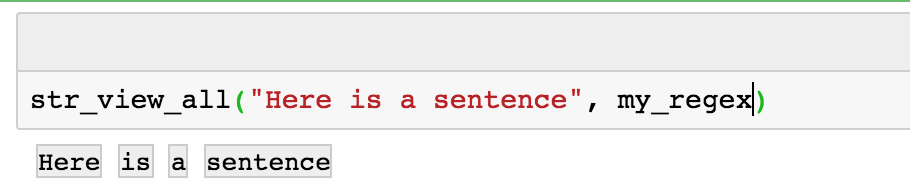

In [216]:
# Your code here

### Exercise

(*Hint*: the `str_count()` function counts the number of times a pattern matches.)
 
**Beginner** How many words are in Chapter 1?

**Advanced** How many words ending in `ing` are in Chapter 1?

In [ ]:
# Your code here

## Grouping
In the previous exercise we found that "Professor" is one of the most common capitalized words. Is there a character named Professor, or is it just a title? Now let us try to match one or more capitalized words in a row. We can accomplish this by creating a *group*, and then applying a quantifier to it. 

To create a group, I surround a part of my regexp with parentheses:

In [50]:
str_view("this will be grouped", "[a-z]+ ?")
str_view("this will be grouped", "([a-z]+ ?)")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

The parentheses do not change the regular expression (but they are doing something else, which we will discuss in the next lecture.) But now I can apply a quantifier to the whole group:

In [53]:
str_view("this will not be grouped", "([a-z]+ ?)")
str_view("this will be grouped", "([a-z]+ ?)+")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Using this technique, we can achieve our original goal of matching all "character names":

In [54]:
str_extract_all(ch1, "([A-Z]\\w{4,} )+", 
                simplify=T) %>% fct_count %>% 
                top_n(10)

Selecting by n


f,n
Dudley,7
Dumbledore,18
Dursley,38
Dursleys,5
Hagrid,7
Harry,9
Muggles,5
Potters,5
Privet,5
Professor,12


Earlier we looked at quotations. The first quotation in chapter 1 is:

In [167]:
str_sub(ch1, 2150, 2163)

[1] "\"Little tyke,\""

How can we find other quotes? The pattern for a quote is a quotation mark, followed by any number of things that are not a quotation mark, followed by another quotation mark:

    <quotation mark><anything that is not a quotation mark><quotation mark>


To match this, we will use a *negation*. A negation is a character class that begins with the character "^". It matches anything that in *not* inside the character class:

In [231]:
str_view_all("match doesn't match", "[^aeiou]+")

HTML widgets cannot be represented in plain text (need html)

To match a quotation, we'll input the pattern that we specified above:

In [232]:
str_view_all('"Here is a quotation", said the professor. "And here is another."',
             '"[^"]+"')

HTML widgets cannot be represented in plain text (need html)

### Exercise
**Beginner** How many quotations are there in ch1?

**Advanced** What is the longest quotation in the whole book?

In [61]:
# Your code here

### Challenge Problem

**Beginner** What is the most common starting and ending letter in `words`?

**Advanced** What is the most common *pair* of starting and ending letters in `words`?

In [118]:
# Your code here

## Backreferences
Parentheses define groups that can be referred to later in the match as `\1`, `\2` etc. This is called a backreference. For example:

    (.)\1

will match the same character repeated twice in a row:

In [69]:
"eel"  %>% str_view("(.)\\1", match = T)

HTML widgets cannot be represented in plain text (need html)

### Exercise
What does this match?

```
re <- "(..).*\\1"
```



In [74]:
# Your code here

### Exercise

**Beginner** Write a regexp that matches words ending in the same vowel repeated twice. (For example, "levee".)

**Advanced** Write a regexp that matches two *or more* repeated characters. It should work as follows:

```
> str_extract(c("breeeeze", "hahahaaaaaaaaa"), 
              my_regexp)
[1] 'eeee' 'aaaaaaaaa'
```

## Alternatives
An *alternative* means *match this or that*. Alternative patterns can be matched using the syntax `(this|that)`.

In [62]:
color_re = "colo(r|ur)"
x <- c("color", "red colour", "coloured glass", "chair", 
       "colored chair")
str_view(x, color_re)

HTML widgets cannot be represented in plain text (need html)

### Example
Suppose we want to match telephone numbers of the form:

* xxx-xxx-xxxx
* (xxx) xxx-xxxx

In [64]:
# complicated because of all the double backslashes
phone_re = "(\\d\\d\\d-|\\(\\d\\d\\d\\) )\\d\\d\\d-\\d\\d\\d\\d" 
writeLines(phone_re)

(\d\d\d-|\(\d\d\d\) )\d\d\d-\d\d\d\d


In [65]:
n <- c("123-456-7890", "(123) 456-7890", "1234567890", "+1-123-456-7890")
str_view(n, phone_re)

HTML widgets cannot be represented in plain text (need html)

### Challenge Question
This command loads the text of Hamlet:

In [80]:
hamlet <- readLines(url("http://erdani.com/tdpl/hamlet.txt"))
writeLines(hamlet[1:15])


1604


THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.


### Exercise

Shakespeare used a lot of [poetic contractions](https://en.wikipedia.org/wiki/Poetic_contraction): `'tis`, `'twas`, `o'er`, etc.

**Beginner** Write a regexp that matches all such contractions

**Advanced** Print a frequency table of the top 10 most common.

In [75]:
# Your code here

## Anchors
Sometimes we want a match to occur at a particular position in the string. For example, "all words which start with b". For this we have the special anchor characters: `^` and `$`. The caret `^` matches the beginning of a string. The `$` matches the end.

In [76]:
x <- c('apple', 'banana', 'pear')
str_view(x, '^b')
str_view(x, 'r$')

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### Exercise
What does this regexp do?
```
re = "^(.).*\\1$" 
```

### `str_extract`
`str_extract(v, re)` extracts substring matched by `re` from each element of `v`. Another way to think of this is as returning the portion of the string which is highlighted by `str_view`:

In [91]:
q = 'Research is formalized curiosity. It is poking and prying with a purpose.'
# re to match capitalized words
# re = NA
# str_view(q, re)
# str_extract(q, re)

Analogous to `str_view_all` we have `str_extract_all`:

In [92]:
str_view_all(q, re)
str_extract_all(q, re)

HTML widgets cannot be represented in plain text (need html)

[[1]]
 [1] "Research"   "is"         "formalized" "curiosity"  "It"        
 [6] "is"         "poking"     "and"        "prying"     "with"      
[11] "a"          "purpose"

### `str_match`
`str_match(v, re)` will create a matrix out of the grouped matches in `re`. The first column has the whole match, and additional columns are added for each character group. If the pattern does not match, you will get `NA`s.

In [47]:
head(str_match(words, '^(.).*(.)$'))

NA,NA,NA
able,a,e
about,a,t
absolute,a,e
accept,a,t
account,a,t


### `str_replace`
`str_replace(v, re, rep)` will replace each match of `re` in `v` with `rep`. The most basic usage is as a sort of find and replace:

In [50]:
str_replace('Give me liberty or give me death', '\\w+$', 'pizza')

[1] "Give me liberty or give me pizza"

A very useful feature of regexp replacements is the ability to use backreferences:

In [103]:
str_replace("If you're going through hell, keep going.", NA) # code to de-apostrophize

[1] "If you are going through hell, keep going."